<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day25_01_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auto Encoder
![대체 텍스트](http://drive.google.com/uc?export=view&id=18bvpRnrlfaWdt2MYgvMbo5igeMXApkns)

In [0]:
import warnings
warnings.filterwarnings(action='ignore') 

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 50
batch_size = 256
display_step = 1
examples_to_show = 10

In [0]:
# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

In [0]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])


![대체 텍스트](http://drive.google.com/uc?export=view&id=1wtuVn2nQrC1-E5-Koy9-g2GU9sI3LHJp)

In [0]:
weights = {
    'encoder_h1': tf.Variable\
    (tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable\
    (tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable\
    (tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable\
    (tf.random_normal([n_hidden_1, n_input])),
}

In [0]:
biases = {
    'encoder_b1': tf.Variable\
    (tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable\
    (tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable\
    (tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable\
    (tf.random_normal([n_input])),
}

In [0]:
# Encoder Hidden layer with sigmoid activation #1
encoder_in = tf.nn.sigmoid(tf.add\
                           (tf.matmul(X, \
                                      weights['encoder_h1']),\
                            biases['encoder_b1']))

In [0]:
# Decoder Hidden layer with sigmoid activation #2
encoder_out = tf.nn.sigmoid(tf.add\
                            (tf.matmul(encoder_in,\
                                       weights['encoder_h2']),\
                             biases['encoder_b2']))


In [0]:
# Encoder Hidden layer with sigmoid activation #1
decoder_in = tf.nn.sigmoid(tf.add\
                           (tf.matmul(encoder_out,\
                                      weights['decoder_h1']),\
                            biases['decoder_b1']))

In [0]:
# Decoder Hidden layer with sigmoid activation #2
decoder_out = tf.nn.sigmoid(tf.add\
                            (tf.matmul(decoder_in,\
                                       weights['decoder_h2']),\
                             biases['decoder_b2']))

In [0]:
# Prediction
y_pred = decoder_out
# Targets (Labels) are the input data.
y_true = X

In [0]:
# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

W0729 09:00:00.271901 140343960500096 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Launch the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())
total_batch = int(mnist.train.num_examples/batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys =\
                  mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost],\
                        feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

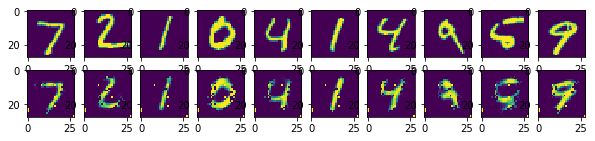

In [0]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict=\
    {X: mnist.test.images[:examples_to_show]})
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
f.show()
plt.draw()
plt.show()